Slice along which axis? Enter 'X' or 'Y':  Y
Enter the constant Y value for the slice:  20
Enter a tolerance (e.g. 0.01):  0.01


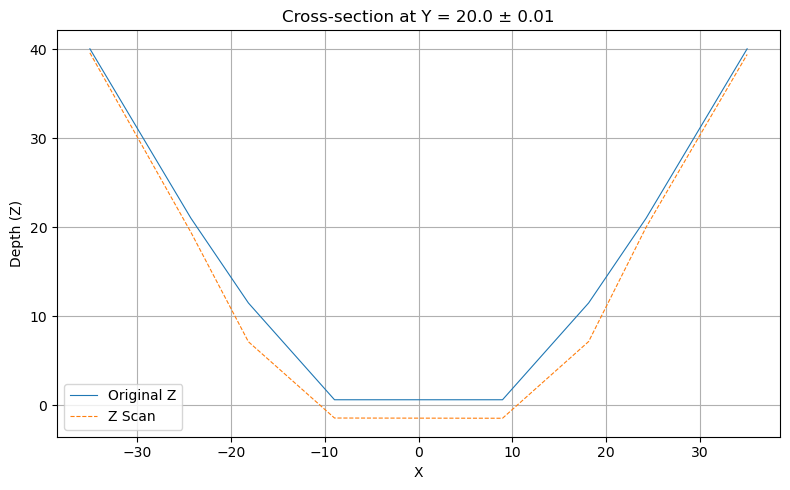

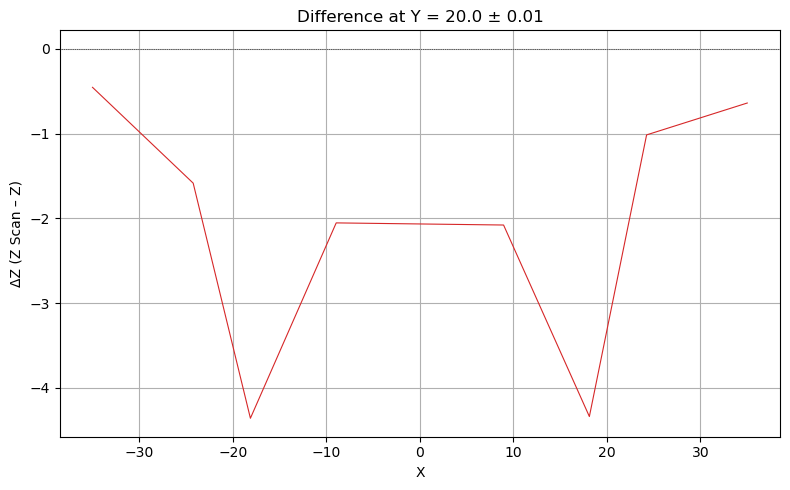

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load your Excel
file = r"C:\Users\ayush\OneDrive\Desktop\bphc\Year 3 Sem 2\DOP\Lab Work\Models\Outside Only\Final DataSet\MLP Keras Version FInal DataSet Ver1\Cone 65\Cone 65 X,Y,Z,Z Scan for 2D Cross Section.xlsx"
df = pd.read_excel(file)

# 2) Get slice parameters
axis = input("Slice along which axis? Enter 'X' or 'Y': ").strip().upper()
if axis not in ('X','Y'):
    raise ValueError("Please enter exactly 'X' or 'Y'.")
val = float(input(f"Enter the constant {axis} value for the slice: "))
tol = float(input("Enter a tolerance (e.g. 0.01): "))

# 3) Extract the band
mask = df[axis].between(val - tol, val + tol)
slice_df = df.loc[mask].copy()

# 4) Figure out horizontal axis
horiz = 'Y' if axis == 'X' else 'X'

# 5) Sort for clean plotting
slice_df.sort_values(by=horiz, inplace=True)

# 6) Overlay the two curves with thinner lines
plt.figure(figsize=(8,5))
plt.plot(
    slice_df[horiz], slice_df['Z'],
    linestyle='-', linewidth=0.8, label='Original Z'
)
plt.plot(
    slice_df[horiz], slice_df['Z Scan'],
    linestyle='--', linewidth=0.8, label='Z Scan'
)
plt.xlabel(horiz)
plt.ylabel('Depth (Z)')
plt.title(f"Cross‐section at {axis} = {val} ± {tol}")
plt.legend()
plt.grid(True)
plt.tight_layout()

# 7) Plot the difference ΔZ = Z Scan – Z with a thinner line
delta = slice_df['Z Scan'] - slice_df['Z']
plt.figure(figsize=(8,5))
plt.plot(
    slice_df[horiz], delta,
    linestyle='-', linewidth=0.8, color='C3'
)
plt.axhline(0, color='k', linewidth=0.5, linestyle=':')
plt.xlabel(horiz)
plt.ylabel('ΔZ (Z Scan – Z)')
plt.title(f"Difference at {axis} = {val} ± {tol}")
plt.grid(True)
plt.tight_layout()

plt.show()
